In [71]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Carregar o arquivo
df_colesterol = pd.read_csv('./datasets/datasets_colesterol.csv')

In [73]:
# Chegar o arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [74]:
# Remover coluna ID
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [75]:
# Renomear as colunas 
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [76]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [77]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [78]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [79]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [80]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [81]:
# Medidas estatisticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [82]:
# Coletar medidas das variaveis categoricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [83]:
# Coletar medidas das variaveis númericas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [84]:
# Imputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [85]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)

In [86]:
# Converter idade e altura para inteiro
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [87]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [88]:
# Visualizar os Dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

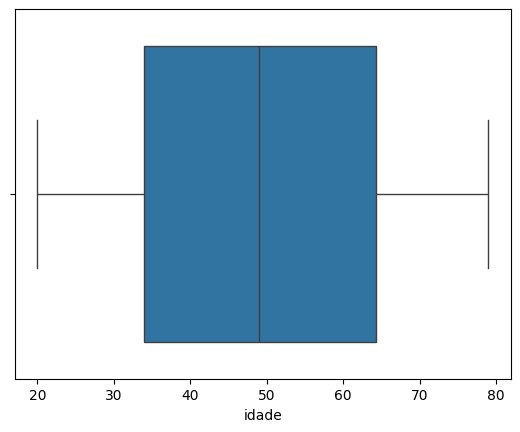

In [89]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

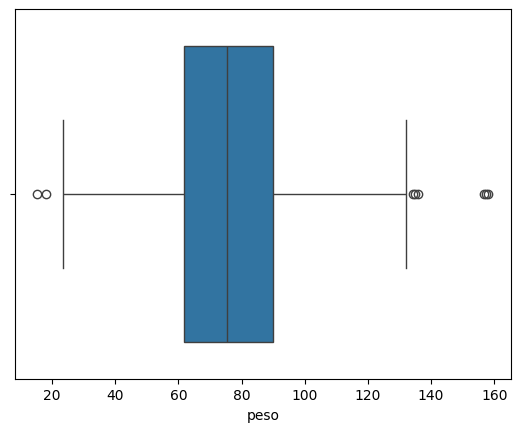

In [90]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='peso')

In [91]:
# Filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [92]:
# Remover publico do DF
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

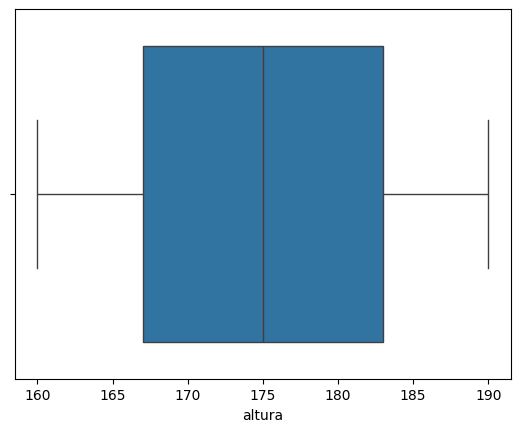

In [93]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

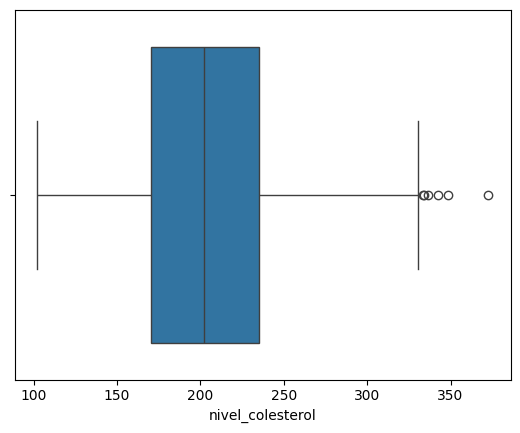

In [94]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

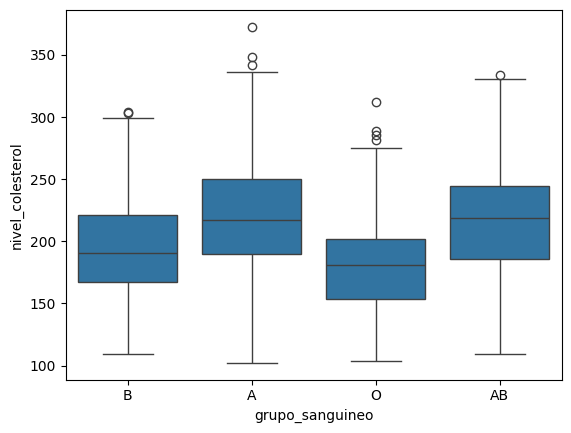

In [95]:
# Cruzamento de Variaveis Categoricas com Nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

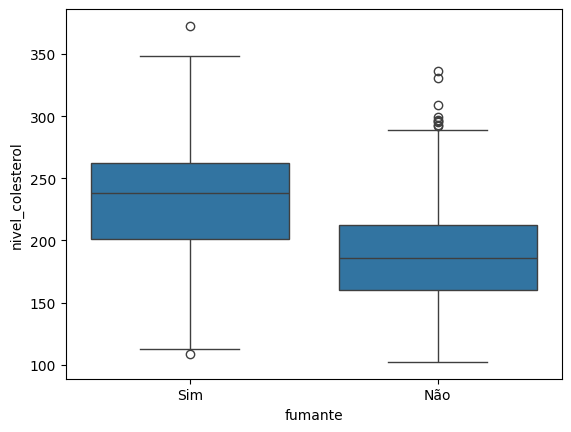

In [96]:
# Cruzamento de Variaveis Categoricas com Nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

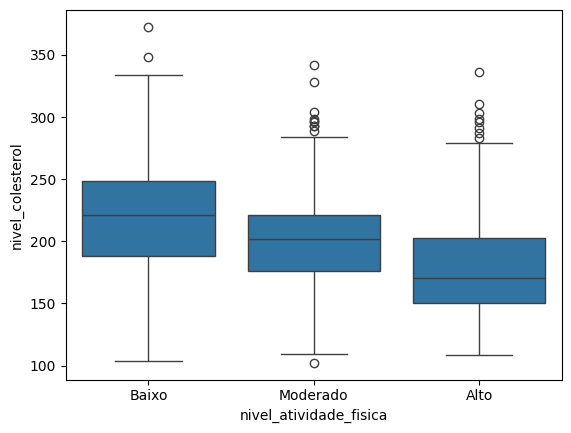

In [97]:
# Cruzamento de Variaveis Categoricas com Nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

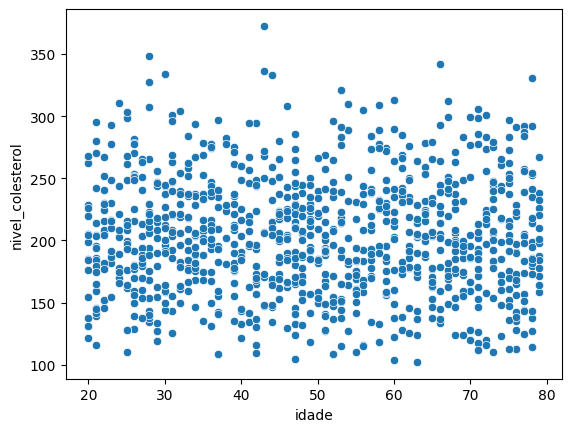

In [98]:
# Cruzamento de Variaveis Númericas com Nivel de colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

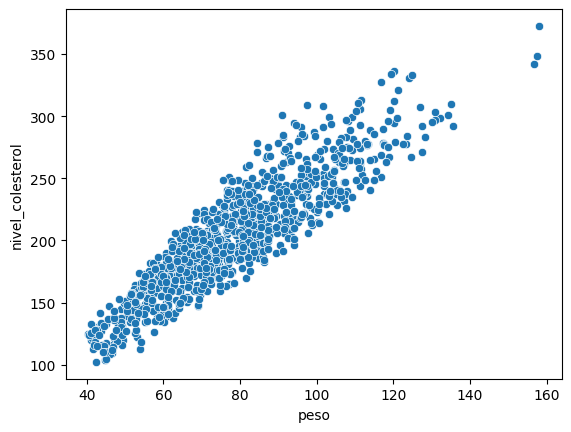

In [99]:
# Cruzamento de Variaveis Númericas com Nivel de colesterol
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

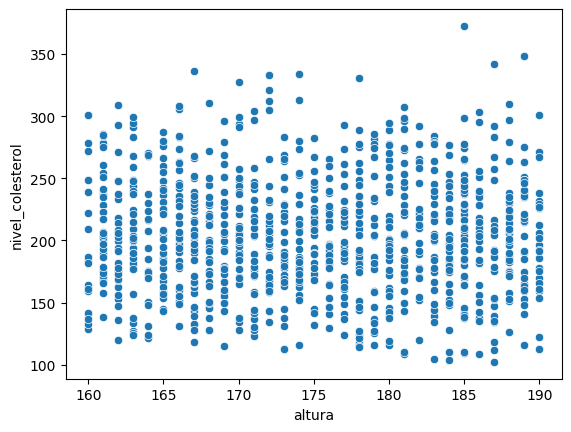

In [100]:
# Cruzamento de Variaveis Númericas com Nivel de colesterol
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

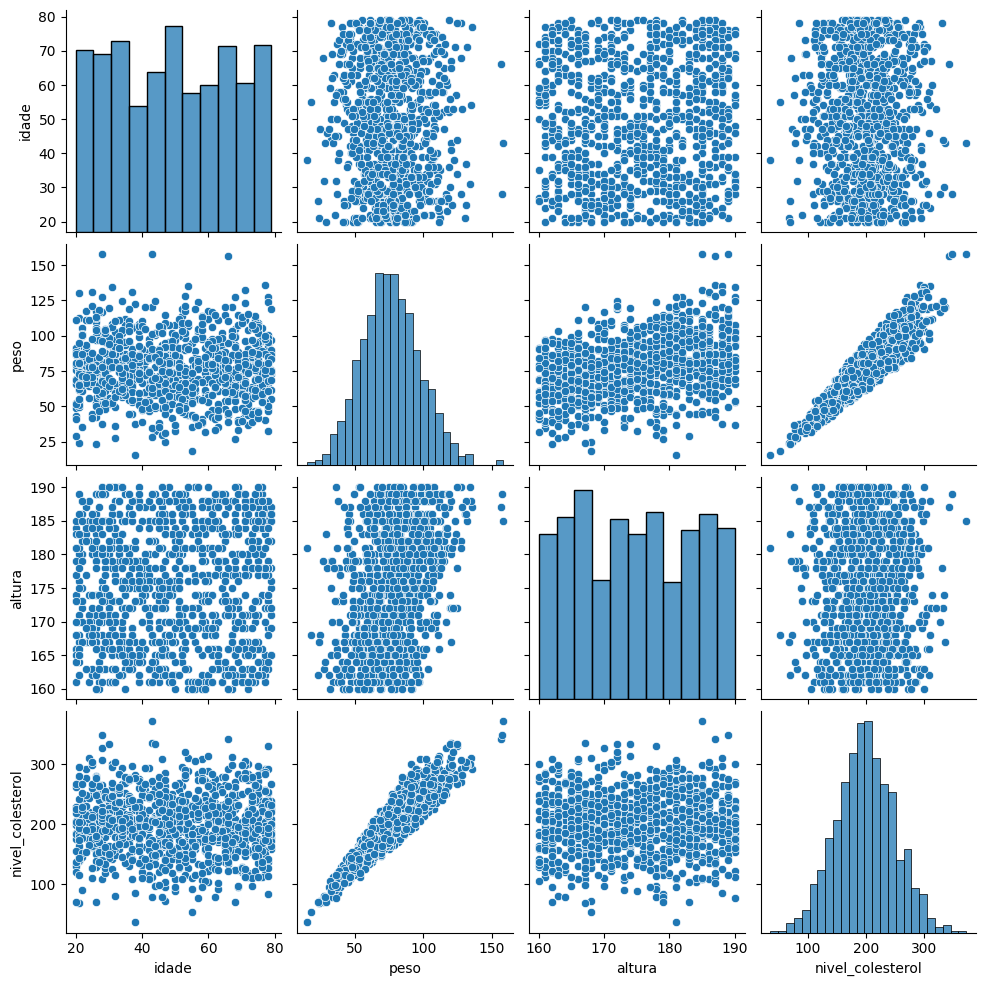

In [101]:
sns.pairplot(df_colesterol)

In [102]:
# Converter variaveis categorias nominais em númericas, usando One-Hot Encoder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [103]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [104]:
# Converter variavel categoria ordinal em numerica, usando o Factorize do Pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

<Axes: >

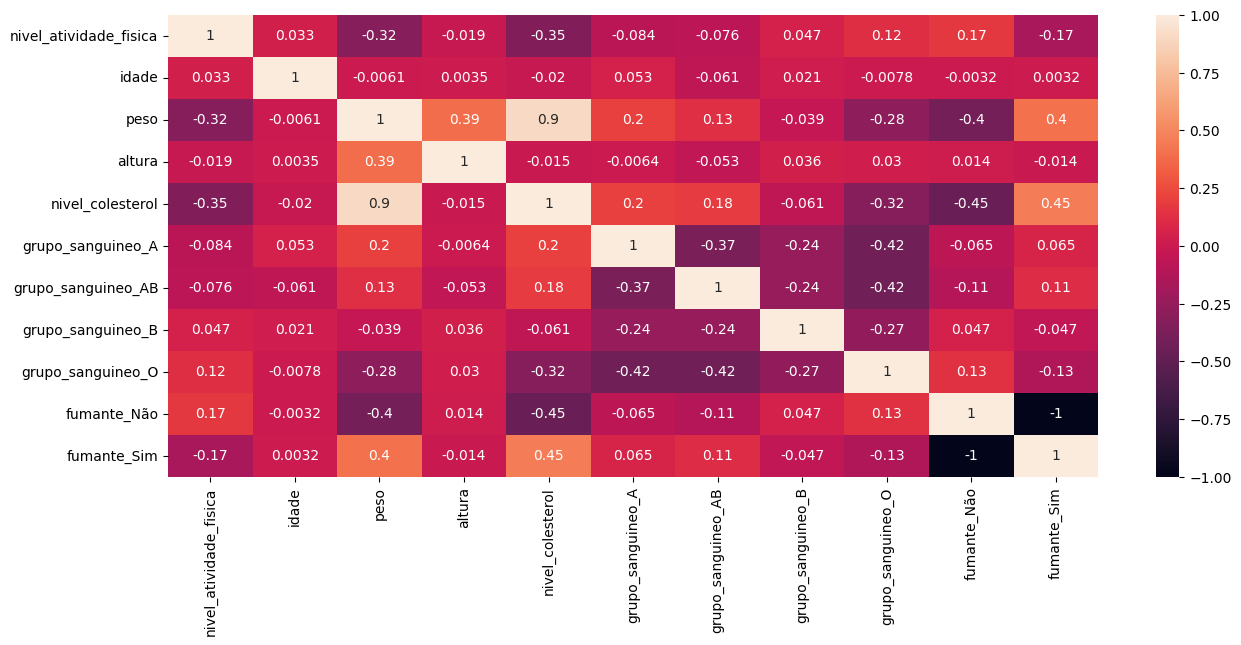

In [105]:
# Mapa de calor com correlação entre as variaveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

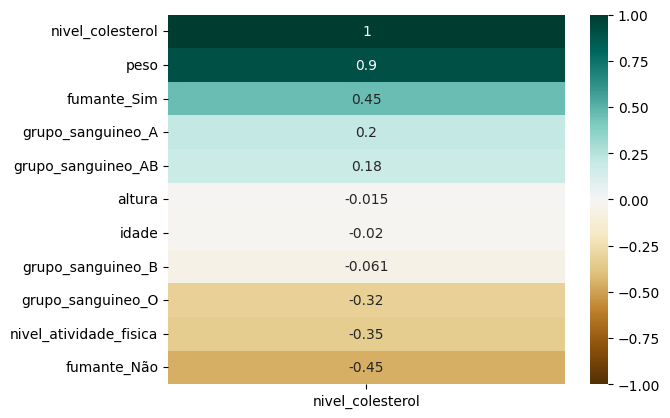

In [106]:
# Formado de Ranking, somente correlação com a variavel target (nivel_colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [107]:
# Bucketing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69','70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

In [108]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

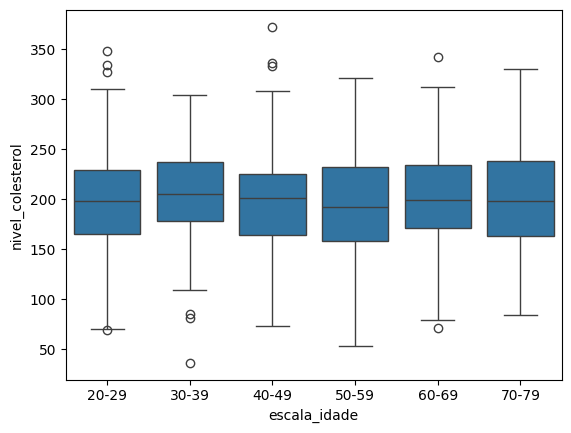

In [109]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [110]:
# Bucketing Peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69','70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

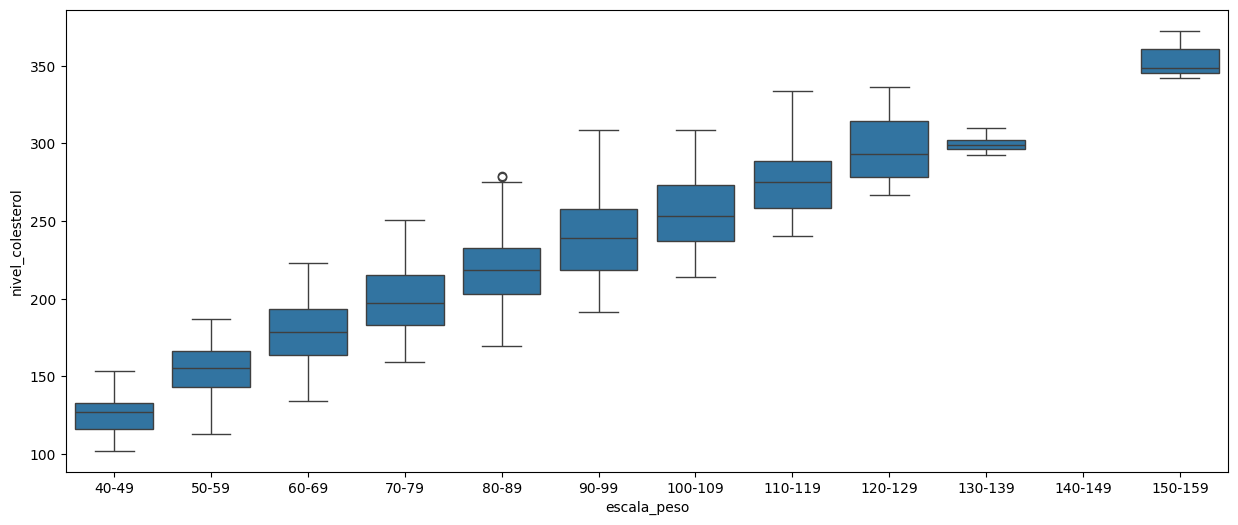

In [111]:
plt.figure(figsize=(15,6))
sns.boxplot(df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

### Treinar Modelo

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [113]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [114]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [115]:
X = df_colesterol.drop(columns='nivel_colesterol', axis=1)
y = df_colesterol['nivel_colesterol']

In [116]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [117]:
y_test.shape

(289,)

In [118]:
# PipeLine
# Imputar moda nas variáveis categoricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variaveis numericas - idade, altura, peso
# OneHotEncode nas variaveis categoricas nominais - grupo_sanguineo, fumante
# OrdinalEncoder nas variaveis categoricas ordinais - nivel_atividade_fisica
# Imputar medianas nas variaveis numericas - idade, peso, altura

# Nomes das Colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade_fisica']

In [119]:
# Transformer Categoricas 
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [120]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [121]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categorias, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais)  # Corrigir aqui
    ]
)

In [123]:
# Criando o Pipeline principal = Pre processamento + Treinamento
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

In [124]:
# Treinar modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

### Análise de Métricas

In [125]:
# Gerar Predição 
y_pred = model_regr.predict(X_test)

In [126]:
# Calcutar o R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [127]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(7.313838031022503)

In [128]:
# Calcular RMSE (Root Mean Absolute Error)
mean_squared_error(y_test, y_pred, squared=False)

c:\Users\T-GAMER\.virtualenvs\regressao_linear_multipla-CLqkeaOE\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(9.097649246487032)

### Analise de Residuos

In [129]:
# Calcular os Residuos
residuos = y_test - y_pred

In [130]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

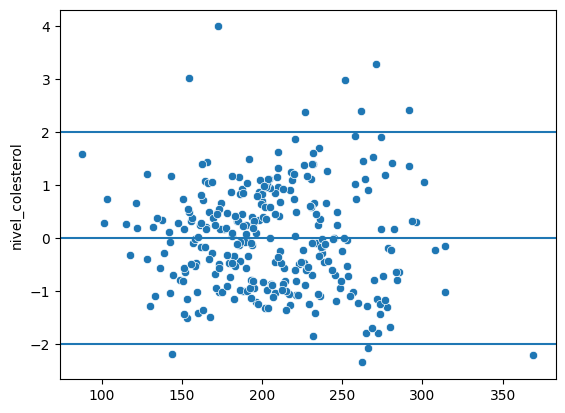

In [131]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala padrão)
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

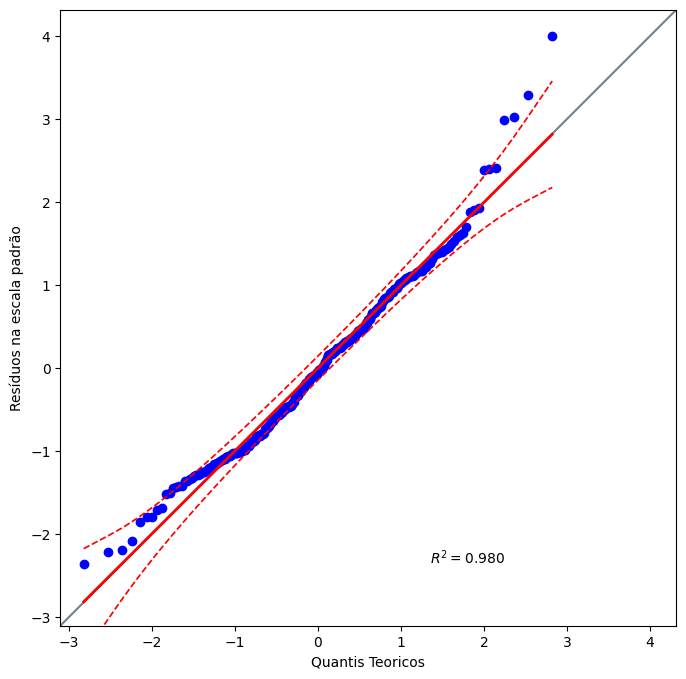

In [132]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()


In [133]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))

Estatistica do Teste: 0.9807737729720729 e P-Value: 0.0006268860444489818


In [134]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

Estatistica do Teste: 0.42455920998485785 e P-Value: 8.92583319090192e-48


In [135]:
# Teste de Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ll, p_value_ll))

Estatistica do Teste: 0.049553710301929066 e P-Value: 0.12533323720735978


In [136]:
# Teste de Anderson-Darling
stat_and, critical_and, significante_and = anderson(residuos, dist='norm')

In [137]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [138]:
significante_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [139]:
print("Estatistica do Teste: {} e Valor Critico: {}".format(stat_and, critical_and[2]))

Estatistica do Teste: 0.9169275158490109 e Valor Critico: 0.776


In [141]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [142]:
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]])

In [144]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfel = test_goldfeld[1]
print("Estatistica do Teste: {} e Valor Critico: {}".format(stat_goldfeld, p_value_goldfel))

Estatistica do Teste: 0.6716135765253543 e Valor Critico: 0.9893959472385484


### Realizar Predições Individuas

In [153]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 40,
    'altura': 180,
    'peso': 70
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [146]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,altura,peso
1,O,Não,Alta,40,180,70


In [154]:
# Predição
model_regr.predict(sample_df)

array([165.32375099])

In [155]:
import joblib

In [156]:
# Salvar o modelo
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']